<a href="https://colab.research.google.com/github/kkrphm/project-Models/blob/main/Random%20Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Connect to Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **import Libraries**

In [ ]:
# For Data Processing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.utils  import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score,roc_auc_score, classification_report,roc_curve, auc
from keras.utils import np_utils
from sklearn.preprocessing import LabelBinarizer

# For ML Models
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import Pipeline

# For Data Visualization
import plotly.graph_objs as go
from plotly import tools
import cv2
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt #used for plotting and analyzing data
import matplotlib
andy_theme = {'axes.grid': True,
              'grid.linestyle': '--',
              'legend.framealpha': 1,
              'legend.facecolor': 'white',
              'legend.shadow': True,
              'legend.fontsize': 14,
              'legend.title_fontsize': 16,
              'xtick.labelsize': 14,
              'ytick.labelsize': 14,
              'axes.labelsize': 16,
              'axes.titlesize': 20,
              'axes.linewidth':'1',
              'axes.edgecolor':'0',
              'figure.dpi': 600
               }

# Miscellaneous
import random
import os #file I/O
import glob
import pickle
import itertools
from tqdm import tqdm

In [ ]:
classes=os.listdir("/content/drive/MyDrive/Project (1)/Brain_Tumor/Training/")
labeld={'pituitary':3, 'glioma':0, 'notumor':2, 'meningioma':1}

## **Training Dataset**

In [ ]:
tumor_images1 = []
labels1 = [] 
for data_dir_path in glob.glob("/content/drive/MyDrive/Project (1)/Brain_Tumor/Training/*"):
  tumor_label = data_dir_path.split("/")[-1]
  for image_path in glob.glob(os.path.join(data_dir_path, "*.jpg")):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image = cv2.resize(image, (110, 110))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  
    tumor_images1.append(image)
    labels1.append(tumor_label)
tumor_images = np.array(tumor_images1)
tumor_images = tumor_images.reshape(len(tumor_images),-1)
labels = np.array(labels1)
print(np.shape(tumor_images))
print(labels)

(5712, 12100)
['pituitary' 'pituitary' 'pituitary' ... 'meningioma' 'meningioma'
 'meningioma']


# **Data Visualization**

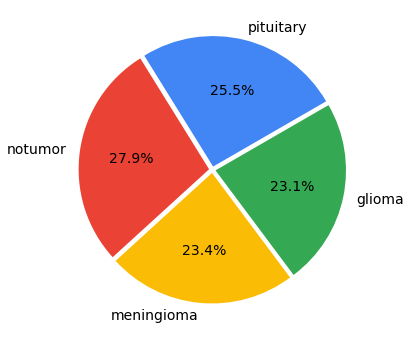

In [ ]:
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie([len([x for x in labels if x=='pituitary']),
         len([x for x in labels if x=='notumor']),
         len([x for x in labels if x=='meningioma']),
         len([x for x in labels if x=='glioma'])],
        labels=['pituitary','notumor', 'meningioma', 'glioma'],
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025,0.025,0.025),
        startangle=30);

## **Validation dataset**

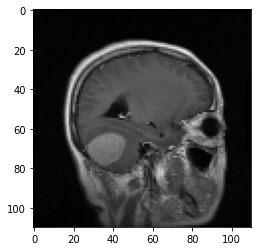

In [ ]:
import matplotlib.pyplot as plt
validation_tumor_images2 = []
validation_labels2 = [] 
validation_label1=[]
for data_dir_path in glob.glob("/content/drive/MyDrive/Project (1)/Brain_Tumor/Testing/*"):
    tumor_label = data_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(data_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (110, 110))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        #image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        validation_tumor_images2.append(image)
        validation_labels2.append(tumor_label)
  
validation_tumor_images = np.array(validation_tumor_images2)
plt.imshow(cv2.cvtColor(validation_tumor_images[4], cv2.COLOR_GRAY2RGB))
plt.show()

validation_tumor_images1 = validation_tumor_images.reshape(len(validation_tumor_images),-1)
validation_labels = np.array(validation_labels2)
for i in validation_labels:
  validation_label1.append(labeld[i])

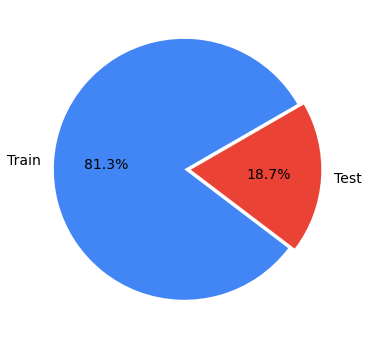

In [ ]:
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie([len(labels), len(validation_labels)],
        labels=['Train','Test'],
        colors=colors, autopct='%.1f%%', explode=(0.05,0),
        startangle=30);

## **Model fitting**

In [ ]:
clfR=RandomForestClassifier(max_depth=9, random_state=2022,oob_score = True)
clfR.fit(tumor_images, labels) 

RandomForestClassifier(max_depth=9, oob_score=True, random_state=2022)

## **Accuracy**

In [ ]:
#Measuring the accuracy
count=0 
total = np.shape(validation_tumor_images1)[0]
#print(total)
for i in range(total):
    check=clfR.predict([validation_tumor_images1[i]])
    if check[0] == validation_labels[i] :
        count += 1
print(count)
print("Accuracy is ", count/total)

1172
Accuracy is  0.8939740655987796


In [ ]:
from sklearn.metrics import r2_score
print("OOB :",clfR.oob_score_)


OOB : 0.906687675070028


## **Model Testing**

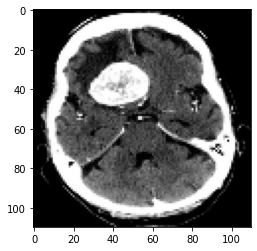

Prediction Score:
 meningioma


In [ ]:
image_path='/content/drive/MyDrive/Project (1)/Brain_Tumor/Testing/meningioma/Te-me_0015.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.resize(image, (110, 110))
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
plt.show()
prediction = clfR.predict(image.reshape(1,12100))
print('Prediction Score:\n',prediction[0])

## **Model save**

In [ ]:
RF_model=pickle.dump(clfR,open('/content/drive/MyDrive/random forest/89%RF.pkl','wb'))

## **Model Loading**

In [ ]:
RF_load = pickle.load(open("/content/drive/MyDrive/random forest/89%RF.pkl","rb"))

## **Loaded Model Testing**

In [ ]:
RF_load.predict(image.reshape(1,12100))

array(['meningioma'], dtype='<U10')

# **Grid Search CV**

In [ ]:
kfold = KFold(n_splits=5,shuffle=True,random_state=2022)
model_rf = RandomForestClassifier(random_state=2022)
params = {'max_features':[10,20,50,100,150,300,1000,2001],
          'n_estimators':[100,150,200]}
gcv = GridSearchCV(model_rf,param_grid=params,cv=kfold,verbose=3)
gcv.fit(tumor_images, labels)
print(gcv.best_params_)
print(gcv.best_score_)
RF1_model=pickle.dump(gcv,open('/content/drive/MyDrive/random forest/GCV_RF.pkl','wb'))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END .max_features=10, n_estimators=100;, score=0.913 total time=   2.5s
[CV 2/5] END .max_features=10, n_estimators=100;, score=0.929 total time=   2.5s
[CV 3/5] END .max_features=10, n_estimators=100;, score=0.909 total time=   2.5s
[CV 4/5] END .max_features=10, n_estimators=100;, score=0.900 total time=   2.5s
[CV 5/5] END .max_features=10, n_estimators=100;, score=0.912 total time=   2.5s
[CV 1/5] END .max_features=10, n_estimators=150;, score=0.913 total time=   3.7s
[CV 2/5] END .max_features=10, n_estimators=150;, score=0.926 total time=   3.7s
[CV 3/5] END .max_features=10, n_estimators=150;, score=0.912 total time=   3.8s
[CV 4/5] END .max_features=10, n_estimators=150;, score=0.902 total time=   3.7s
[CV 5/5] END .max_features=10, n_estimators=150;, score=0.911 total time=   3.7s
[CV 1/5] END .max_features=10, n_estimators=200;, score=0.914 total time=   4.9s
[CV 2/5] END .max_features=10, n_estimators=200

# **Model Fit with Tuned HyperParameters**

In [ ]:
clfR=RandomForestClassifier(max_features=1000,n_estimators=150, random_state=2022,oob_score = True)
clfR.fit(tumor_images, labels) 

RandomForestClassifier(max_features=1000, n_estimators=150, oob_score=True,
                       random_state=2022)

## **Model evaluation**

In [ ]:
#Measuring the accuracy
count=0 
total = np.shape(validation_tumor_images)[0]
#print(total)
for i in range(total):
    check=clfR.predict([validation_tumor_images[i]])
    if check[0] == validation_labels[i] :
        count += 1
print(count)
print("Accuracy is ", count/total)

1229
Accuracy is  0.9374523264683448


In [ ]:
from sklearn.metrics import r2_score
print("OOB :",clfR.oob_score_)


OOB : 0.9332983193277311


## **Model Testing**

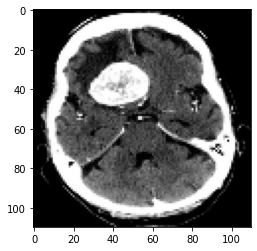

Prediction Score:
 meningioma


In [ ]:
image_path='/content/drive/MyDrive/Project (1)/Brain_Tumor/Testing/meningioma/Te-me_0015.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.resize(image, (110, 110))
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
plt.show()
prediction = clfR.predict(image.reshape(1,12100))
print('Prediction Score:\n',prediction[0])

## **Model save**

In [ ]:
RF_model=pickle.dump(clfR,open('/content/drive/MyDrive/random forest/93%RF.pkl','wb'))

## **Model Loading**

In [ ]:
RF_load = pickle.load(open("/content/drive/MyDrive/random forest/93%RF.pkl","rb"))

## **Accuracy**

In [ ]:
#Measuring the accuracy
count=0 
total = np.shape(validation_tumor_images)[0]
pred_test=[]
pred_labels=[]
#print(total)
for i in range(total):
    check=RF_load.predict([validation_tumor_images1[i]])
    pred_test.append(check[0])
    pred_labels.append(labeld[check[0]])
    if check[0] == validation_labels[i] :
        count += 1
print(count)
print("Accuracy is ", count/total)

1229
Accuracy is  0.9374523264683448


# **Confusion Matrix**


predict_labels_Test
Numbre of pituitary : 260
Numbre of glioma : 331
Numbre of notumor : 412
Numbre of meningioma : 308

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       260
           1       0.92      0.85      0.88       331
           2       1.00      0.98      0.99       412
           3       0.97      0.94      0.96       308

   micro avg       0.94      0.94      0.94      1311
   macro avg       0.93      0.94      0.93      1311
weighted avg       0.94      0.94      0.94      1311
 samples avg       0.94      0.94      0.94      1311

Confusion Matrix


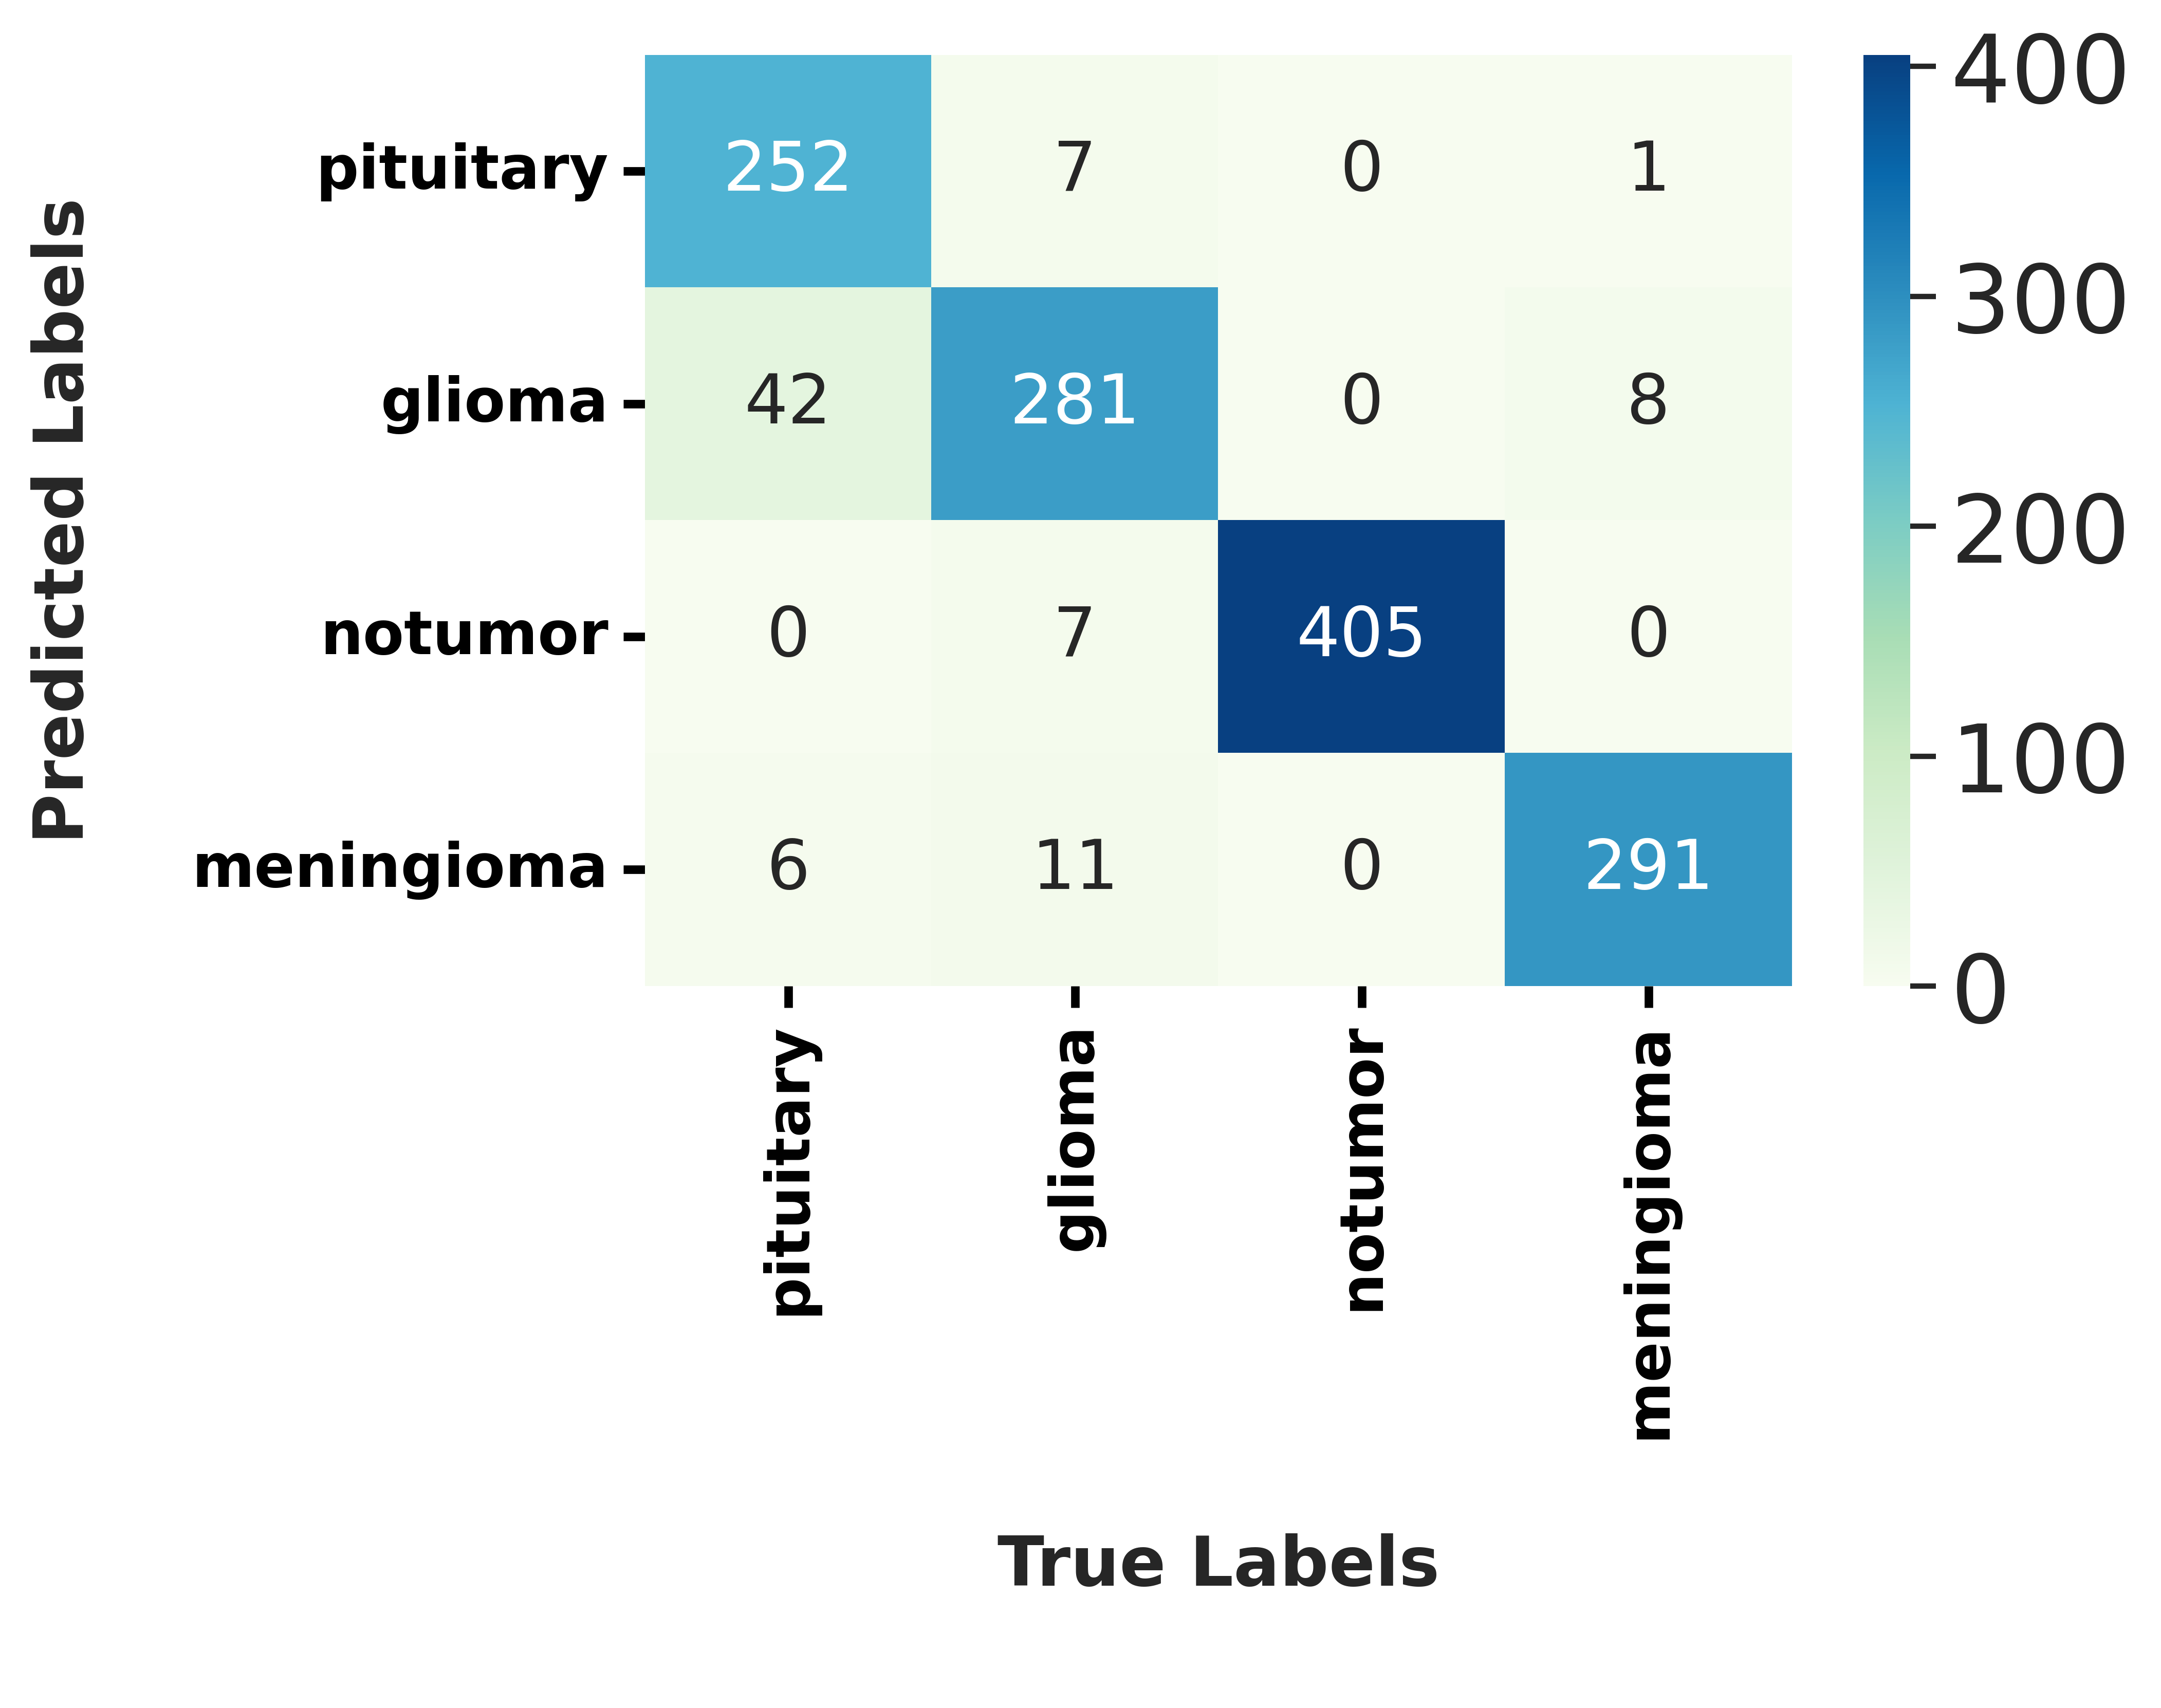

In [ ]:
num_classes=4
predict_labels_Test = pred_labels
predict_labels_Test1 = predict_labels_Test
predict_labels=pred_labels
# print(predict_labels)

predict_labels_TestV2_ctg = np_utils.to_categorical(predict_labels, num_classes)
labels_Test_ctg = np_utils.to_categorical(validation_label1, num_classes)
predict_labels_Ar = np.asarray(predict_labels)
print("\npredict_labels_Test")
print(f'Numbre of {classes[0]} : {(predict_labels_Ar == 0).sum()}')
print(f'Numbre of {classes[1]} : {(predict_labels_Ar == 1).sum()}')
print(f'Numbre of {classes[2]} : {(predict_labels_Ar == 2).sum()}')
print(f'Numbre of {classes[3]} : {(predict_labels_Ar == 3).sum()}')

print("\n"+classification_report(predict_labels_TestV2_ctg, labels_Test_ctg))

cm = confusion_matrix(pred_test, validation_labels) 
#cm1=np.array([[126, 1, 3], [0,193,9],[0,7,190]])

print('Confusion Matrix')
plt.figure()
ax= plt.subplot()
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(which='major', width=1.00)
ax.tick_params(which='major', length=5)
ax.tick_params(which='minor', width=0.75)
ax.tick_params(which='minor', length=2.5)
ax.tick_params(direction='out', length=5, width=2, colors='black',
               grid_color='black', grid_alpha=0.5)
sns.set(font_scale=2)
sns.heatmap(cm, annot= True, fmt='', cmap='GnBu', cbar=True, annot_kws={"size": 16})
labels=classes
plt.rcParams.update(andy_theme)
ax.set_xlabel("\nTrue Labels\n" ,fontweight="bold")
ax.set_ylabel("Predicted Labels\n" ,fontweight="bold")
# ax.set_title('Confusion Matrix of Random Forest Model',fontweight="bold"); 
ax.xaxis.set_ticklabels(labels,fontweight="bold", rotation = 90,); 
ax.yaxis.set_ticklabels(labels,fontweight="bold", rotation = 0,);

plt.show()


In [ ]:
pred_labelsc=to_categorical(pred_labels)
validation_label1c=to_categorical(validation_label1)

In [ ]:
AUC=roc_auc_score(validation_label1c,pred_labelsc)
AUC  

0.9557618935513701

In [ ]:
pred_labelsc=to_categorical(pred_labels)
validation_label1c=to_categorical(validation_label1)

# **ROC_AUC Curve**

In [ ]:
AUC=roc_auc_score(validation_label1c,pred_labelsc)
AUC  

0.9557618935513701

ROC AUC score: 0.9582292745497134


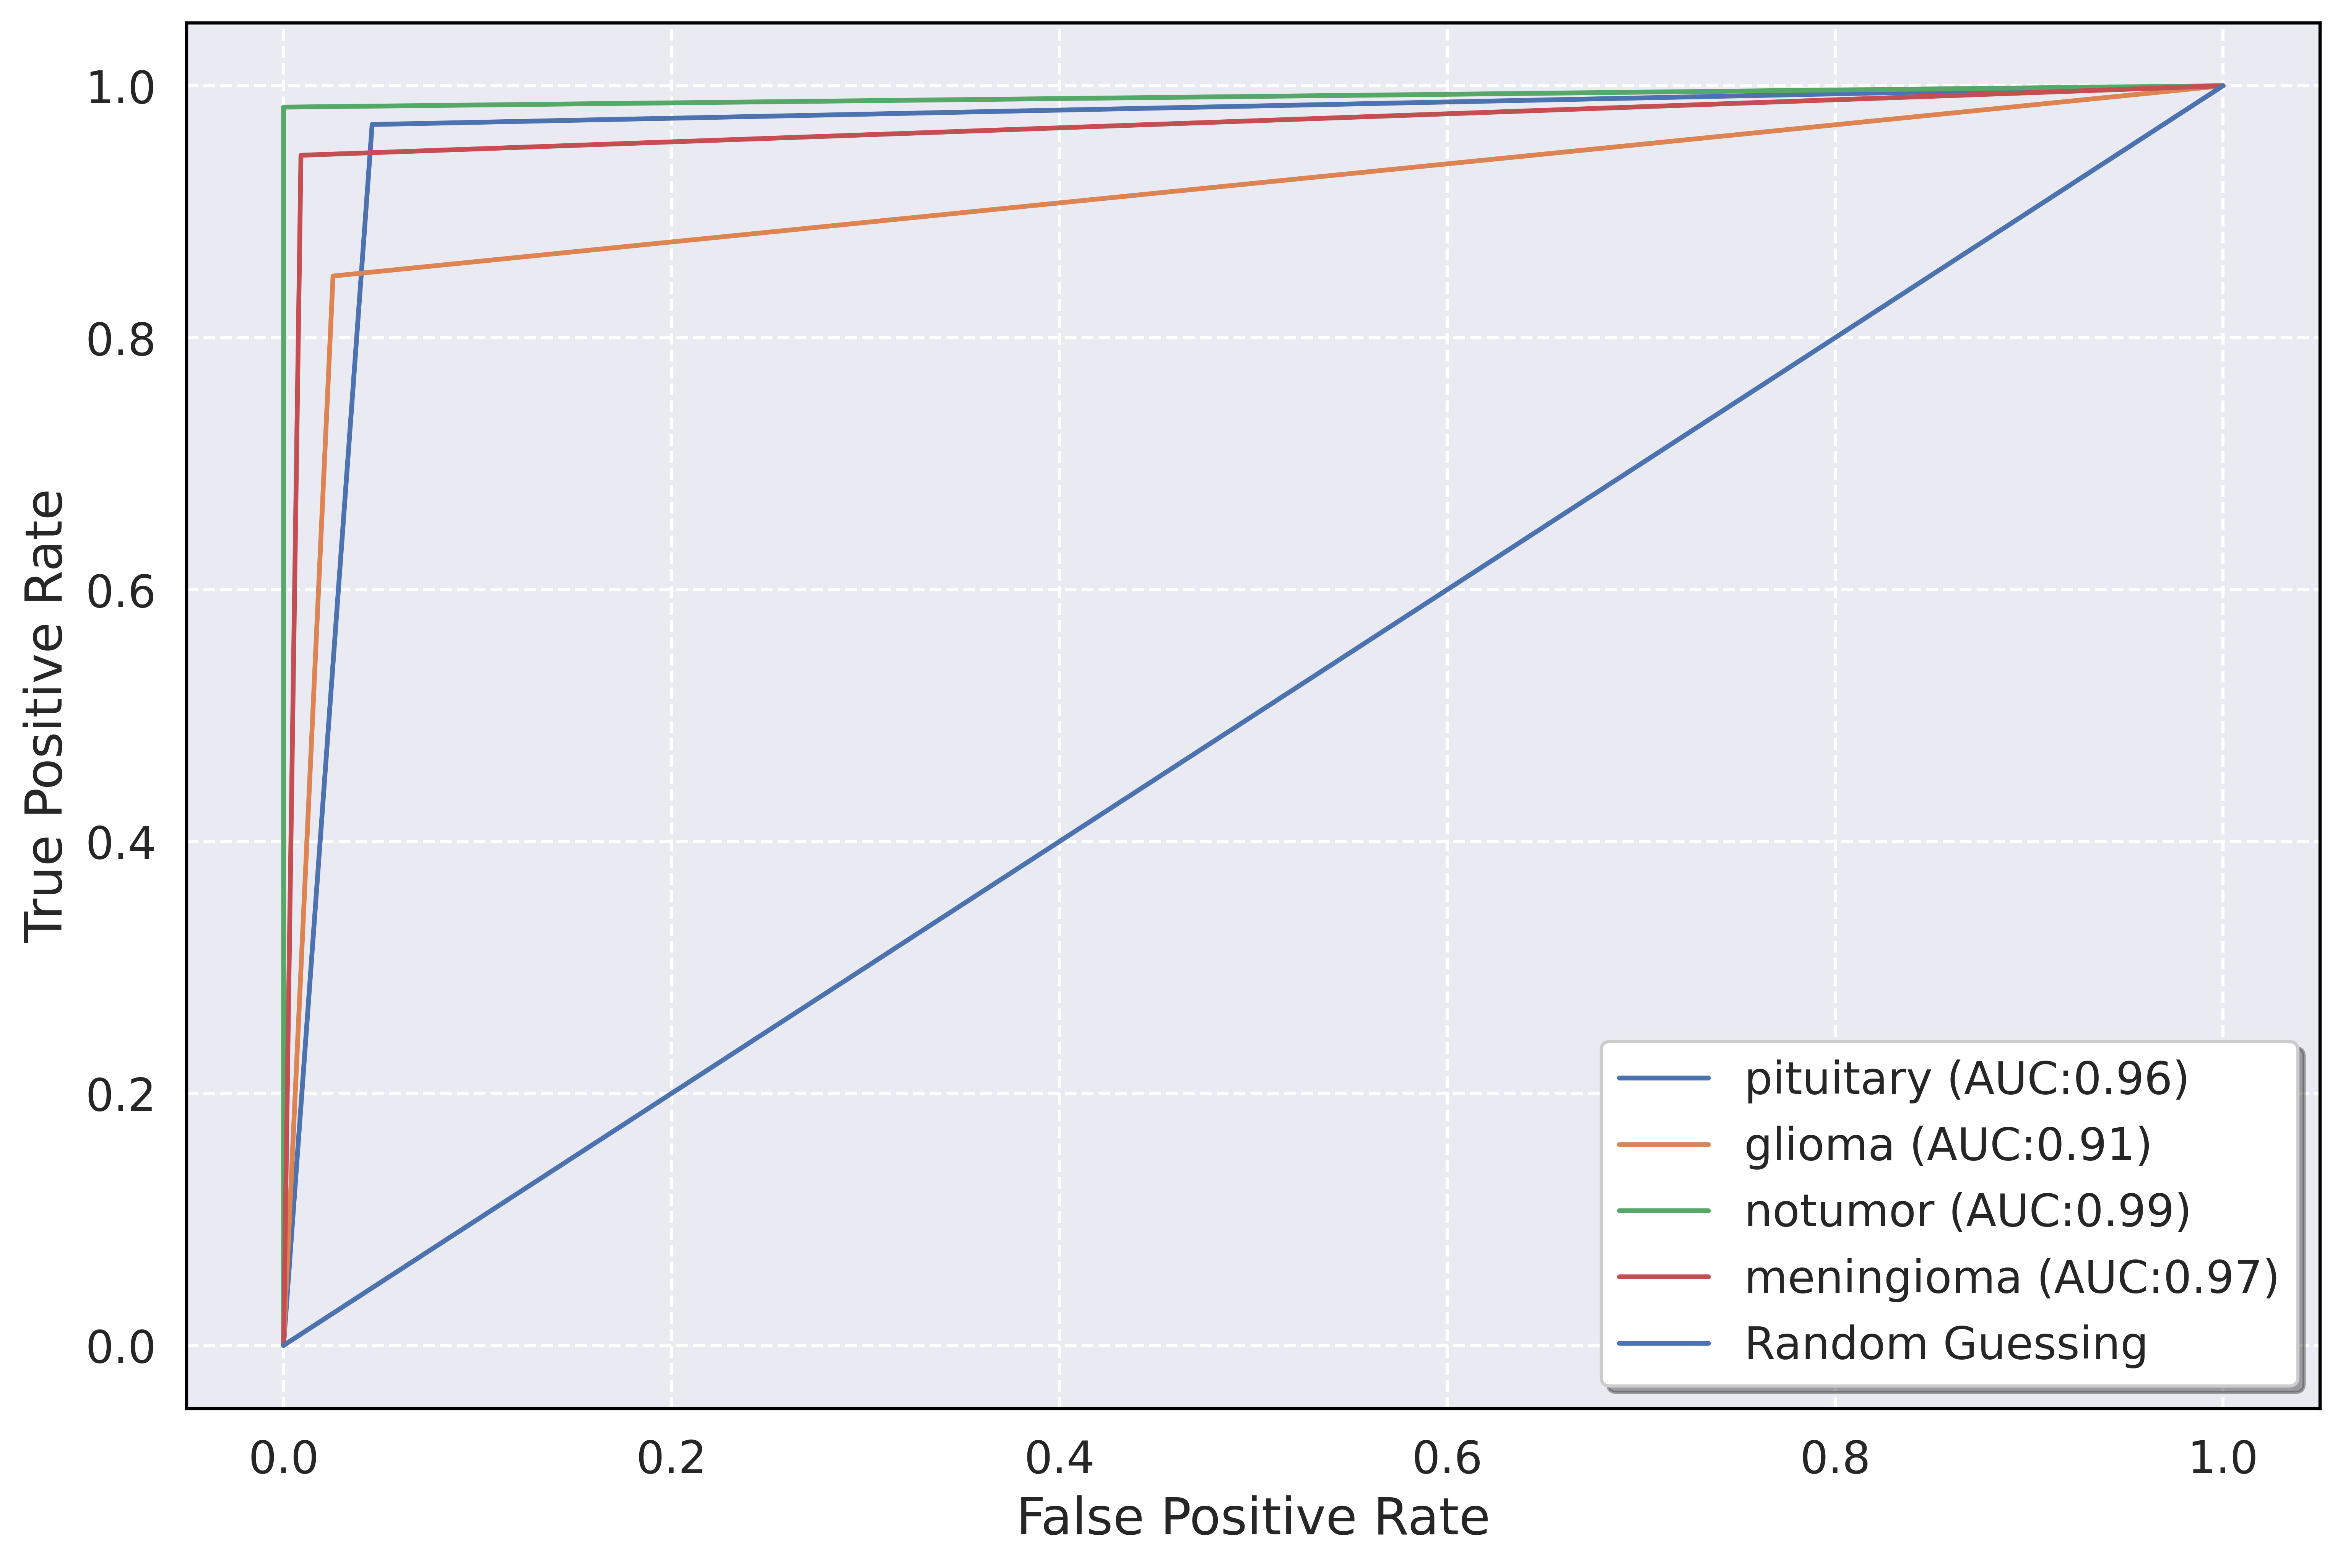

In [ ]:
target= labeld.keys()

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(pred_test, validation_labels))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()


## **Loaded Model Testing**

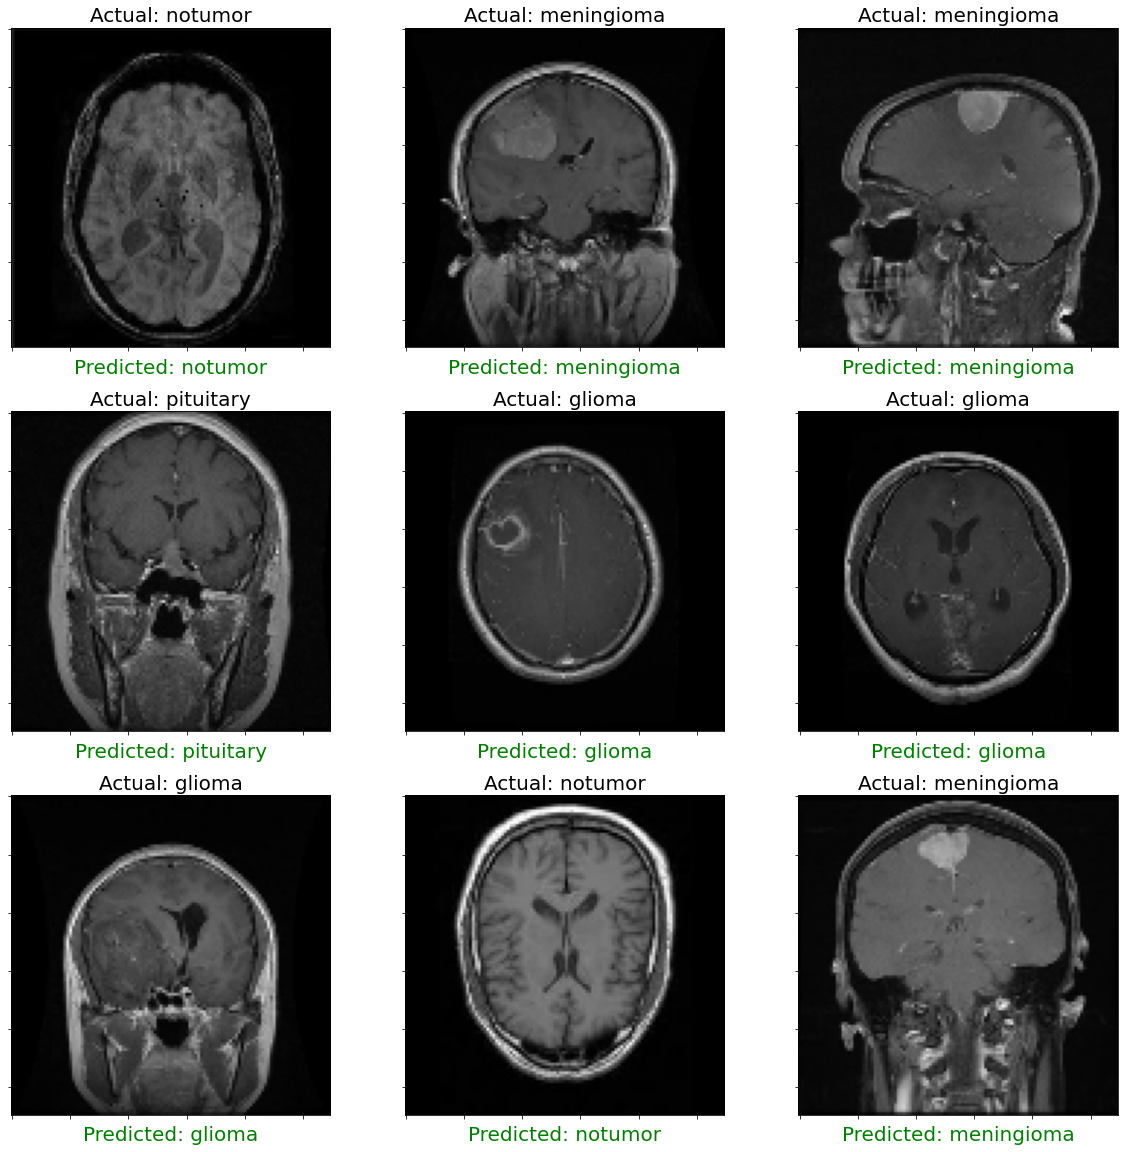

In [ ]:
plt.figure(figsize=(20, 20))
test_sample_list=random. sample(range(1311), 9)
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    # plt.grid()
    plt.imshow(cv2.cvtColor(validation_tumor_images[test_sample_list[i]], cv2.COLOR_GRAY2RGB))
    check=RF_load.predict(validation_tumor_images[test_sample_list[i]].reshape(1,12100))
    if(validation_labels[test_sample_list[i]]==check[0]):
            plt.title("Actual: "+validation_labels[test_sample_list[i]],fontsize=20)
            plt.xlabel("Predicted: "+ check[0],fontsize=20,fontdict={'color':'green'})
            
    else:
            plt.title("Actual: "+ validation_labels[test_sample_list[i]],fontsize=20)
            plt.xlabel("Predicted: "+ check[0],fontsize=20, fontdict={'color':'red'})
    plt.gca().axes.yaxis.set_ticklabels([])        
    plt.gca().axes.xaxis.set_ticklabels([])
    